# AI6120 : Assignment 2

*Submission* : Solve the problems in this Jupyter Notebook format (preferred), in sequence, as follows. Rename this file to `Assignment2_MATID.ipynb` where `MATID` is your NTU Matriculation ID, and submit through NTU Learn (Assignments section). If you prefer to solve the problems in standalone Python code format, please name the individual files meaningfully, put all `.py` files in a single folder, ZIP it (not RAR please), rename to `Assignment2_MATID.zip` where `MATID` is your NTU Matriculation ID, and submit through NTU Learn (Assignments section). Submissions over email will *not* be entertained.

---

## Levenshtein Distance

Given two strings as User input, write a function to compute the *Levenshtein Distance* (https://en.wikipedia.org/wiki/Levenshtein_distance) between them.    

In [ ]:
# Define a Function to compute Levenshtein Distance
def levdist(firstString, secondString):
  ''' Computes Levenshtein Distance between two Strings.
      input : two strings
      output : levenshtein distance
  '''
  # Write your code for the function here
  if firstString == secondString:
    return 0
  lenA = len(firstString)
  lenB = len(secondString)
  if lenA > lenB:
    firstString, secondString = secondString, firstString
    lenA, lenB = lenB, lenA
  if firstString in secondString:
    return lenB - lenA

  startIdx, endIdx = mismatch(firstString, secondString)
  firstString = firstString[startIdx:lenA + endIdx + 1]
  secondString = secondString[startIdx:lenB + endIdx + 1]

  buffer = [i for i in range(len(secondString) + 1)]

  for i in range(len(firstString)):
    tmp, buffer[0] = buffer[0], buffer[0] + 1

    for j in range(len(secondString)):
      deletionCost = buffer[j + 1] + 1
      insertionCost = buffer[j] + 1
      if firstString[i] == secondString[j]:
        substitutionCost = tmp
      else:
        substitutionCost = tmp + 1

      tmp, buffer[j + 1] = buffer[j + 1], min(deletionCost, insertionCost, substitutionCost)

  return buffer[-1]

def mismatch(firstString, secondString):
  startIdx = 0
  endIdx = -1
  lenA = min(len(firstString), len(secondString))

  for i in range(lenA):
    if firstString[i] != secondString[i]:
      startIdx = i
      break

  for i in range(1, lenA + 1):
    if firstString[-i] != secondString[-i]:
      endIdx = -i
      break

  return startIdx, endIdx

# Call the Function
levdist("singapore", "indonesia")

In [ ]:
# Define a Function to compute Levenshtein Distance
def levdist(firstString, secondString):
  ''' Computes Levenshtein Distance between two Strings.
      input : two strings
      output : levenshtein distance
  '''
  # Write your code for the function here
  v0 = [i for i in range(len(secondString) + 1)]
  v1 = [i for i in v0]

  for i in range(len(firstString)):
    v1[0] = i + 1

    for j in range(len(secondString)):
      deletionCost = v0[j + 1] + 1
      insertionCost = v1[j] + 1
      if firstString[i] == secondString[j]:
        substitutionCost = v0[j]
      else:
        substitutionCost = v0[j] + 1
      v1[j + 1] = min(deletionCost, insertionCost, substitutionCost)

    v0, v1 = v1, v0

  return v0[-1]

levdist("singapore", "indonesia")

In [ ]:
# Define a Function to compute Levenshtein Distance
def levdist(firstString, secondString):
  ''' Computes Levenshtein Distance between two Strings.
      input : two strings
      output : levenshtein distance
  '''
  # Write your code for the function here
  lenA = len(firstString)
  lenB = len(secondString)
  if lenA == 0 or lenB == 0:
    return max(lenA, lenB)
  if firstString[0] == secondString[0]:
    return levdist(firstString[1:], secondString[1:])
  else:
    return  1 + min(levdist(secondString[0] + firstString, secondString),
                    levdist(firstString[1:], secondString),
                    levdist(secondString[0] + firstString[1:], secondString))

levdist("singapore", "indonesia")

---
## Convolution Filtering

In image processing, several operations (blurring, sharpening, embossing, edge detection, etc.) can be accomplished by doing a **convolution between a kernel and an image**, where the Kernel or Mask (https://en.wikipedia.org/wiki/Kernel_(image_processing)) refers to a small ($3 \times 3$, say) numeric matrix.


Import `poDumpling.jpg` using NumPy, convert it to Grayscale, as in `Chapter5_PythonComputing`, and choose any $3 \times 3$ kernel for processing the image (from https://en.wikipedia.org/wiki/Kernel_(image_processing)). Apply the chosen kernel as a *convolution filter* on the Grayscale image to accomplish the target image processing task (one out of blurring, sharpening, embossing, edge detection), and show the final result. Use *only* NumPy in this process.

In [ ]:
# Import the image in NumPy and convert to Grayscale
# Choose target image processing task and the kernel
# Perform convolution with the image and your kernel
# Display the original and the final grayscale image
from IPython.display import Markdown
from PIL import Image
import numpy as np

boxBlur = np.ones((3,3)) / 9

gaussianBlur = np.array([[1,  4,  6,  4, 1],
                         [4, 16, 24, 16, 4],
                         [6, 24, 36, 24, 6],
                         [4, 16, 24, 16, 4],
                         [1,  4,  6,  4, 1]]) / 256

sharpen = np.array([[ 0, -1,  0],
                    [-1,  5, -1],
                    [ 0, -1,  0]])

emboss = np.array([[-2, -1,  0],
                   [-1,  1,  1],
                   [ 0,  1,  2]])

edgeDetection = np.array([[-1, -1, -1],
                          [-1,  8, -1],
                          [-1, -1, -1]])

def grayScale(im):
  return np.dot(im[:,:,0:3], [0.299, 0.587, 0.114])

def convolve2D(im, kernel):
  imPad = np.pad(im, int(kernel.shape[0]/2), 'symmetric')
  imOut = np.zeros(im.shape)
  for i in range(im.shape[0]):
    for j in range(im.shape[1]):
      imOut[i][j] = np.sum(imPad[i:i+kernel.shape[0], j:j+kernel.shape[0]] * kernel)
  imOut = np.clip(imOut, 0, 255)
  return imOut

im = np.asarray(Image.open('poDumpling.jpg'))
display(Image.fromarray(im, 'RGB'))

display(Markdown("## Grayscale"))
im = grayScale(im)
display(Image.fromarray(np.uint8(im), 'L'))

display(Markdown("## Box Blur"))
imBoxBlur = convolve2D(im, boxBlur)
display(Image.fromarray(np.uint8(imBoxBlur), 'L'))

display(Markdown("## Gaussian Blur"))
imGaussianBlur = convolve2D(im, gaussianBlur)
display(Image.fromarray(np.uint8(imGaussianBlur), 'L'))

display(Markdown("## Sharpen"))
imSharpen = convolve2D(im, sharpen)
display(Image.fromarray(np.uint8(imSharpen), 'L'))

display(Markdown("## Emboss"))
imEmboss = convolve2D(im, emboss)
display(Image.fromarray(np.uint8(imEmboss), 'L'))

display(Markdown("## Edge Detection"))
imEdgeDetection = convolve2D(im, edgeDetection)
display(Image.fromarray(np.uint8(imEdgeDetection), 'L'))

---
## Normal Equation for Linear Regression

Note that there exists a simple linear algebraic closed-form solution $\theta = (X^TX)^{-1}X^Ty$ of Ordinary Least Squares linear regression of the form $y = X\theta + \epsilon$, as detailed in http://mlwiki.org/index.php/Normal_Equation (learn this first). This closed-form solution is known as *Normal Equation* for Linear Regression.

Use the `pokemonData.csv` dataset, as in `Chapter6_DataHandling`, and solve for the regression coefficients in case of an Ordinary Least Squares linear regression for response variable `Total` vs predictors `HP`, `Attack`, `Defense`, `Speed`. Use the *Normal Equation* closed-form for the solution.

In [ ]:
# Import the dataset (as appropriate for the problem)
# Convert the required columns to vectors or matrices
# Compute the normal equation solution for regression
import numpy as np
import pandas as pd

def OLS(X, y, fit_intercept = False):
  if fit_intercept:
    X_offset = np.average(X, axis = 0)
    y_offset = np.average(y, axis = 0)
    y = y - y_offset
    X = X - X_offset

  XT = X.transpose()
  invXTX = np.linalg.inv(np.dot(XT, X))
  w = np.linalg.multi_dot([invXTX, XT, y])

  if fit_intercept:
    intercept = y_offset - np.dot(X_offset, w)
  else:
    intercept = 0.0

  return w.reshape((1,X.shape[1])), intercept

pkmnData = pd.read_csv('pokemonData.csv')
y = pkmnData[['Total']]
X = pkmnData[['HP', 'Attack', 'Defense', 'Speed']]

w, intercept = OLS(X, y)
print(w)
print(intercept)

w, intercept = OLS(X, y, fit_intercept = True)
print(w)
print(intercept)

Use `LinearRegression` from `scikit-learn`, as in `Chapter7_BasicDataScience`, on the `pokemonData.csv` dataset (use all 800 datapoints as the training set) to find the regression coefficients of Ordinary Least Squares linear regression for response variable `Total` vs predictors `HP`, `Attack`, `Defense`, `Speed`. Compare the parameters to the *Normal Equation* closed-form for the solution that you found in the cell above, and see if they match.

In [ ]:
# Train scikit-learn LinearRegression on the dataset
# Check if the model parameters match with the above
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

pkmnData = pd.read_csv('pokemonData.csv')
y = pkmnData[['Total']]
X = pkmnData[['HP', 'Attack', 'Defense', 'Speed']]

linreg = LinearRegression(fit_intercept=False).fit(X, y)
print(linreg.coef_)
print(linreg.intercept_)

linreg = LinearRegression().fit(X, y)
print(linreg.coef_)
print(linreg.intercept_)

---
## Scale-Free Network

"A scale-free network is a network whose degree distribution follows a power law, at least asymptotically. That is, the fraction $P(k)$ of nodes in the network having $k$ connections to other nodes goes for large values of $k$ as $P(k) \sim k^{-\gamma}$, where $\gamma$ is a parameter whose value typically lies in the range $2 < \gamma < 3$, although occasionally it may lie outside these bounds." -- Wikipedia (https://en.wikipedia.org/wiki/Scale-free_network).

In this problem, you will write a program to analyze the statistical properties of a social network, and decide if it is a *scale-free network*, as defined above. In a graph or network, the *degree* of a node is defined as the number of other nodes connected with it. You will have to calculate and analyze the distribution of node degrees for a given graph $G$ that represents a social network, to see if $G$ represents a *scale-free network*. This is quite important in Network Analysis.

Choose any Social Network $G$ from https://snap.stanford.edu/data/#socnets as your input, and write a program to calculate the degrees of all the nodes in the network. Think of how to represent a Graph in Python. You may use either an adjacency matrix or an array of adjacency lists to represent the graph/network.

In [ ]:
# Import a social network data in the given format
# Represent the data as a "graph" (as appropriate)
# Calculate the degree of all nodes in the network

# Facebook dataset: https://snap.stanford.edu/data/ego-Facebook.html
# Type Undirected
# Nodes	4039
# Edges	88234
def readGraph(filename, directed = False):
  nodeDeg = []
  with open(filename, "r", encoding = "utf8") as file:
      for line_count, line in enumerate(file):
          nodes = [int(i) for i in line.split(' ')]
          maxNode = max(nodes)
          if directed:
            if len(nodeDeg) < maxNode + 1:
              nodeDeg.extend([[0] * 2 for i in range(maxNode - len(nodeDeg) + 1)])
            nodeDeg[nodes[0]][1] = nodeDeg[nodes[0]][1] + 1 # Out-degree
            nodeDeg[nodes[1]][0] = nodeDeg[nodes[1]][0] + 1 # In-degree
          else:
            if len(nodeDeg) < maxNode + 1:
              nodeDeg.extend([0] * (maxNode - len(nodeDeg) + 1))
            nodeDeg[nodes[0]] = nodeDeg[nodes[0]] + 1
            nodeDeg[nodes[1]] = nodeDeg[nodes[1]] + 1
  return nodeDeg

nodeDeg = readGraph('facebook_combined.txt')

Plot a histogram for the node degrees in your network $G$, where the variable on `x`-axis is $k$ (i.e., the degree of the nodes), and the variable on `y`-axis is $P(k)$ (i.e., the fraction of nodes having degree equal to $k$). Try to empirically estimate $\gamma$ for $G$ by fitting a curve on this histogram, such that $P(k) \sim k^{-\gamma}$.      

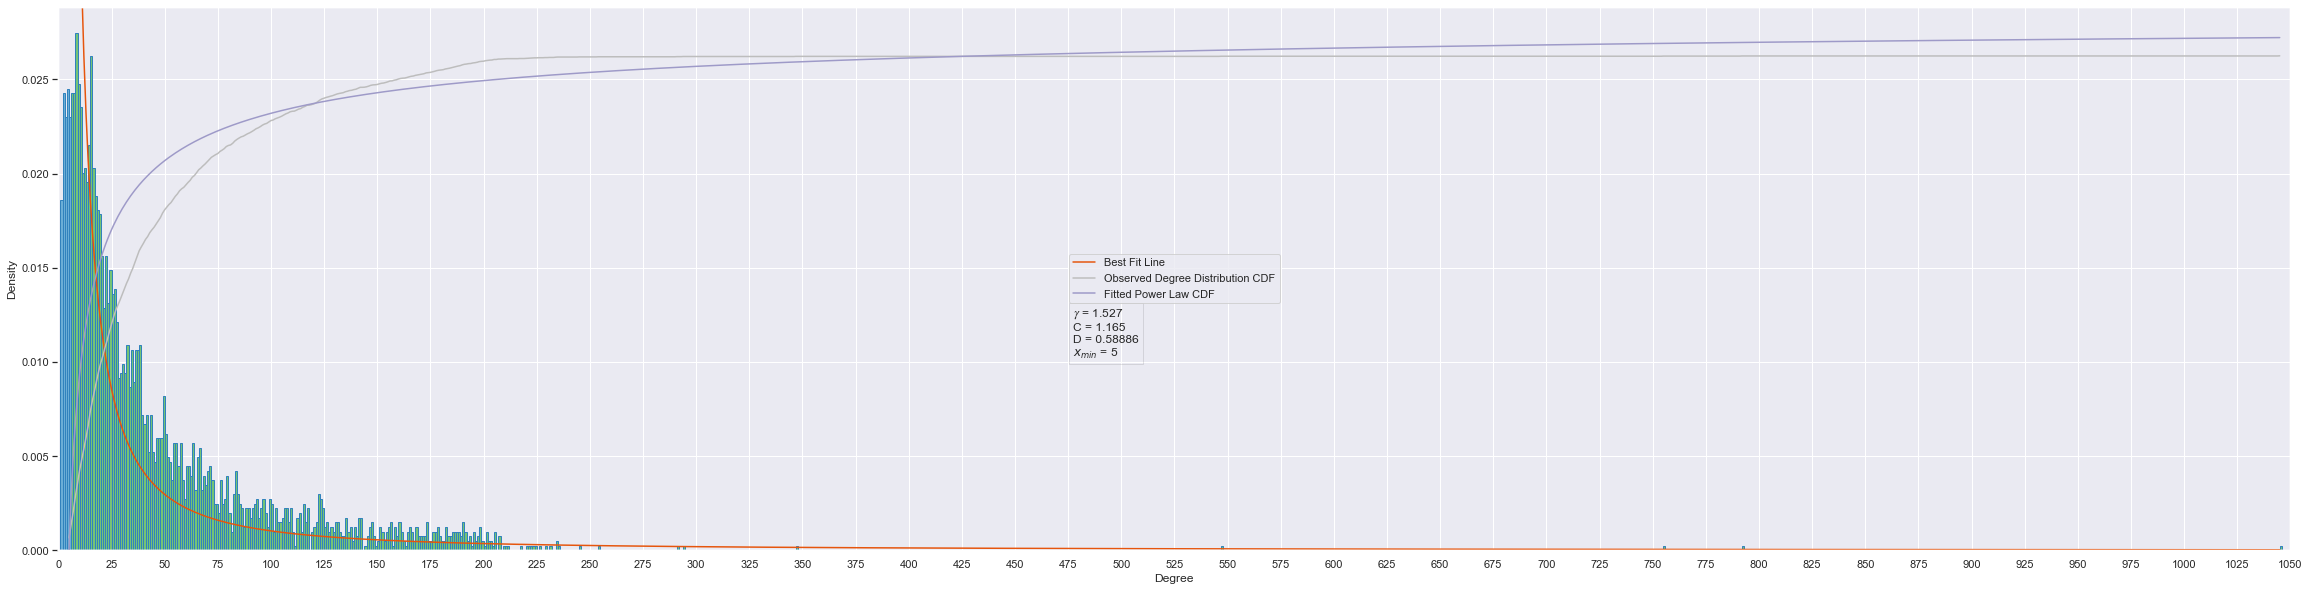

In [2]:
# Use the "degree distribution" computed as above
from scipy import stats
from scipy.special import zeta
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sb
sb.set()

def histogram(nodeDeg, x_min):
  maxDeg = max(nodeDeg)
  xtick_interval = 25
  xtick_max = xtick_interval - (maxDeg % xtick_interval) + maxDeg
  fig = plt.figure(figsize = (40, 10))
  hist, bins, patches = plt.hist(nodeDeg, bins = range(1, maxDeg + 2), density=True, color = sb.color_palette("tab20c")[1], ec = sb.color_palette("tab20c")[0])
  fig.axes[0].set_xticks(range(0, xtick_max + 1, xtick_interval))
  fig.axes[0].set_xlim((0, xtick_max))

  # Color bars for which x_i >= x_min
  for i in range(x_min, maxDeg):
    patches[i].set_facecolor(sb.color_palette("tab20c")[9])

  ax1 = fig.axes[0]
  ax2 = ax1.twinx()
  ax3 = ax1.twinx()
  ax4 = ax1.twinx()
  ax2.set_ylim(fig.axes[0].get_ylim())
  ax3.set_ylim(0.0, 1.0)
  ax4.set_ylim(0.0, 1.0)
  ax2.get_yaxis().set_visible(False)
  ax3.get_yaxis().set_visible(False)
  ax4.get_yaxis().set_visible(False)

  # Maximum Likelihood Estimation
  likelihood = 0
  N = 0
  for x_i in range(x_min, len(hist) + 1):
    likelihood += hist[x_i - 1] * math.log(x_i / (x_min - 0.5))
    N = N + hist[x_i - 1]
  g = 1 +  (N / likelihood)
  C = 1 / zeta(g, x_min)
  histFitted = [C * (i**-g) for i in bins[:-1]]

  # Kormogorov-Smirnov Test - Used for validating which X_min in the range of observed (x_min, x_max) in data samples gives the best fit.
  cdf_data = []
  cdf_fitted = []
  cumulProbData = 0
  for x_i in range(x_min, len(hist) + 1):
    cumulProbData = cumulProbData + hist[x_i - 1]
    cdf_data.append(cumulProbData)
    cdf_fitted.append(1 - ( zeta(g, x_i) / zeta(g, x_min) ) )
  D = stats.kstest(cdf_fitted, cdf_data).statistic

  sb.lineplot(x = bins[:-1], y = histFitted, color = sb.color_palette("tab20c")[4], ax = ax2, legend = 'full') # Best Fit Line
  sb.lineplot(x = bins[x_min-1:-1], y = cdf_data, color = sb.color_palette("tab20c")[18], ax = ax3) # CDF for observed degree
  sb.lineplot(x = bins[x_min-1:-1], y = cdf_fitted, color = sb.color_palette("tab20c")[13], ax = ax4) # CDF for fitted power law

  fig.axes[0].set_xlabel("Degree")
  fig.axes[0].set_ylabel("Density")
  plt.legend([ax2.get_lines()[0], ax3.get_lines()[0], ax4.get_lines()[0]],['Best Fit Line', 'Observed Degree Distribution CDF', 'Fitted Power Law CDF'], loc = 'center')
  ax1.text(0.4545, 0.3985, "$𝛾$ = %.3f\nC = %.3f\nD = %.5f\n$x_{min}$ = %d" % (g, C, D, x_min), transform=ax1.transAxes, horizontalalignment='left', verticalalignment='center', bbox=dict(ec = 'black', facecolor = 'None', alpha=0.1))
  plt.show()

# for i in range(1, 20 + 1):
#   histogram(nodeDeg, i)
histogram(nodeDeg, 5)

## Tic-Tac-Toe Game

Write a program so that a User may play the `Tic-Tac-Toe` game (https://en.wikipedia.org/wiki/Tic-tac-toe) against the Computer.  
Your program should facilitate and play the game as a player, that is, you are writing basic AI logic. Your program needs to:  

- Start the game with a blank 3 x 3 Tic-Tac-Toe board
- Offer `X` (first move) or `O` (second move) to User
- Play the game against the User with the other symbol
- Record the move made by each player in their own turn
- Prints the 3 x 3 board with symbols after every move
- Determine after every move if any player won the game
- Announce the result (the Winner or Draw) at the end

In [ ]:
# Tic-Tac-Toe Game for User vs Computer
# Offer "X" (first move) or "O" (second move)
# Play against the User with the other symbol
import copy
import math
import random
from IPython.display import clear_output

topBox = "╔═══╦═══╦═══╗\n║ "
midBox = " ║\n╠═══╬═══╬═══╣\n║ "
botBox = " ║\n╚═══╩═══╩═══╝\n"
errNum = "Invalid integer input. Valid Range 1 - 9. Re-enter:"
errPos = "Position already occupied. Re-enter:"
errTeam = "Invalid choice. Valid options: 1st move (X) or 2nd move (O). Re-enter:"
board = [0]*9
symbol = {-2:"╳",-1:"×",0:" ",1:"○",2:"●"}

AIPlayer = 0
heuristic = {-3: -math.inf, -2: 10, -1: 1, 0: 0, 1: 1, 2: 10, 3: math.inf}
lookahead = 3
AILogic = 'heuristic' # 'heuristic' or 'random'

def rot90(x):
  return [x[2],x[5],x[8],x[1],x[4],x[7],x[0],x[3],x[6]]
  return

def rot270(x):
  return [x[6],x[3],x[0],x[7],x[4],x[1],x[8],x[5],x[2]]
  return

def printBoard(end):
  boardStr = topBox
  for i in range(0,9):
    if board[i] != 0 or end:
      boardStr += symbol[board[i]]
    else:
      boardStr += str(i+1)
    if (i + 1) % 3 != 0:
      boardStr += " ║ "
    elif i != 8:
      boardStr += midBox
  boardStr += botBox
  print(boardStr)

def promptPlayer(prompt):
  userIn = input(prompt)
  clear_output()
  return userIn

def playerMove(turn):
  printBoard(end=False)
  if turn % 2 != 1:
    userIn = promptPlayer("Player A:")
  else:
    userIn = promptPlayer("Player B:")
  while True:
    try:
      userIn = int(userIn)
    except ValueError:
      printBoard(end=False)
      userIn = promptPlayer(errNum)
    if isinstance(userIn, int):
      if userIn < 1 or userIn > 9:
        printBoard(end=False)
        userIn = promptPlayer(errNum)
      elif board[userIn-1] != 0:
        printBoard(end=False)
        userIn = promptPlayer(errPos)
      elif turn % 2 != 1:
        board[userIn-1] = -1
        break
      else:
        board[userIn-1] = 1
        break

def markWin(row,result):
  global board
  if row != None:
    board[row] += result
    board[row+1] += result
    board[row+2] += result
  else:
    board[0] += result
    board[4] += result
    board[8] += result
  return result

def evalBoardInner():
  global board
  #Evaluate Diagonals
  diag = sum(board[0:9:4])
  if diag == -3 or diag == -3:
    return markWin(None,-1)
  elif diag == 3 or diag == 3:
    return markWin(None,1)
  #Evaluate Rows
  for i in range(0,9,3):
    rowSum = sum(board[i:i+3])
    if rowSum == -3:
      return markWin(i,-1)
    elif rowSum == 3:
      return markWin(i,1)
  return 0

def evalBoard():
  global board
  for i in range(0,2):
    result = evalBoardInner()
    if i == 1:
      board = rot270(board)
    elif result != 0:
      break
    else:
      board = rot90(board)
  return result

def getPlayerTeam():
  global AIPlayer
  printBoard(end=False)
  userIn = promptPlayer("1st move (X) or 2nd move (O):")
  while True:
    userIn = userIn.lower()
    if userIn != "x" and userIn != "o":
      printBoard(end=False)
      userIn = promptPlayer(errTeam)
    else:
      if userIn == "x":
        AIPlayer = 1
      break

def AIMove(turn, mode = 'random'):
  global board
  global lookahead
  availMoves = []
  for i in range(9):
    if board[i] == 0:
      availMoves.append(i)
  if len(availMoves) == 1:
    if turn % 2 != 1:
      board[availMoves[0]] = -1
    else:
      board[availMoves[0]] = 1
  elif mode == 'random':
    if turn % 2 != 1:
      board[availMoves[random.randrange(len(availMoves))]] = -1
    else:
      board[availMoves[random.randrange(len(availMoves))]] = 1
  elif mode == 'heuristic':
    heurScore = [0] * len(availMoves)
    for idx, move in enumerate(availMoves):
      heurScore[idx] = AIEvalBoard(board, turn, move, lookahead)
    if turn % 2 != 1:
      board[availMoves[heurScore.index(min(heurScore))]] = -1
    else:
      board[availMoves[heurScore.index(max(heurScore))]] = 1

def AIEvalBoard(board, turn, move, lookahead):
  boardCopy = copy.copy(board)
  if turn % 2 != 1:
    boardCopy[move] = -1
  else:
    boardCopy[move] = 1
  score = AIHeuristic(boardCopy)
  if lookahead == 0 or turn == 8 or (score == math.inf or score == -math.inf):
    if turn % 2 == 1: turn = -turn
    return score
  else:
    availMoves = []
    for i in range(9):
      if boardCopy[i] == 0:
        availMoves.append(i)
    heurScore = [0] * len(availMoves)
    turn = turn + 1
    for idx, move in enumerate(availMoves):
      heurScore[idx] = AIEvalBoard(boardCopy, turn, move, lookahead - 1)
    if turn % 2 != 1:
      return min(heurScore)
    else:
      return max(heurScore)

def AIHeuristicInner(board):
  score = 0
  #Evaluate Diagonals
  diag = sum(board[0:9:4])
  score += heuristic[diag]
  #Evaluate Rows
  for i in range(0,9,3):
    rowSum = sum(board[i:i+3])
    score = score + heuristic[rowSum]
  return score

def AIHeuristic(board):
  score = 0
  for i in range(0,2):
    score += AIHeuristicInner(board)
    if i == 1:
      board = rot270(board)
    elif score == math.inf or score == -math.inf:
      return score
    else:
      board = rot90(board)
  return score

getPlayerTeam()
for turn in range(0,9):
  if turn % 2 != AIPlayer:
    playerMove(turn)
  else:
    AIMove(turn, mode = AILogic)
  result = evalBoard()
  if result == -1:
    printBoard(end=True)
    print("Player A Wins!")
    break
  elif result == 1:
    printBoard(end=True)
    print("Player B Wins!")
    break
  elif turn == 8:
    printBoard(end=True)
    print("Draw!")

**End of Assignment : Please follow the Submission Procedure to submit the Assignment through NTU Learn**